# AI Assignment 9

# Excercise 1)
### Visualize the data

Domain of flower species

In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('irisdata.csv')

# Display unique species names
unique_species = data['species'].unique()
print("Unique species in the dataset:", unique_species)


Unique species in the dataset: ['setosa' 'versicolor' 'virginica']


## Excercise 1a)

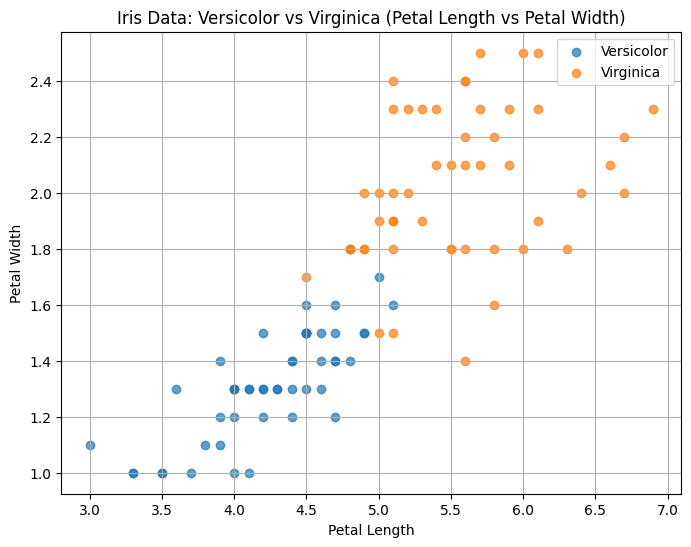

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('irisdata.csv')

# Filter classes 2 and 3 (Versicolor and Virginica)
class_2 = data[data['species'] == 'versicolor']
class_3 = data[data['species'] == 'virginica']

# Extract petal length and width for the two classes
petal_length_class_2 = class_2['petal_length']
petal_width_class_2 = class_2['petal_width']
petal_length_class_3 = class_3['petal_length']
petal_width_class_3 = class_3['petal_width']

# Plot the two classes
plt.figure(figsize=(8, 6))
plt.scatter(petal_length_class_2, petal_width_class_2, label='Versicolor', alpha=0.7)
plt.scatter(petal_length_class_3, petal_width_class_3, label='Virginica', alpha=0.7)

# Add plot details
plt.title('Iris Data: Versicolor vs Virginica (Petal Length vs Petal Width)')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


## Excercise 1b) and 1c)

### Concept
A one-layer neural network computes its output using a **sigmoid activation function**, which maps the input to a value between 0 and 1. This is useful for binary classification tasks.

### Equation
The output of the network is:

$$
\hat{y} = \sigma(w \cdot x + b) \sigma(z) = \frac{1}{1 + e^{-z}}
$$

Where:
- \( x \): Input feature vector.
- \( w \): Weight vector.
- \( b \): Bias term.
- \( \sigma(z) \): Sigmoid activation function.

### Context
This is used to classify data points (e.g., petal measurements of Iris species) into one of two classes by modeling the decision boundary as a smooth probabilistic function.


Input features (first 5 rows):
[[4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]]

True labels (first 5 rows):
[0 0 0 0 0]

Neural network outputs (first 5 rows):
[0.59868766 0.62245933 0.52497919 0.76852478 0.59868766]


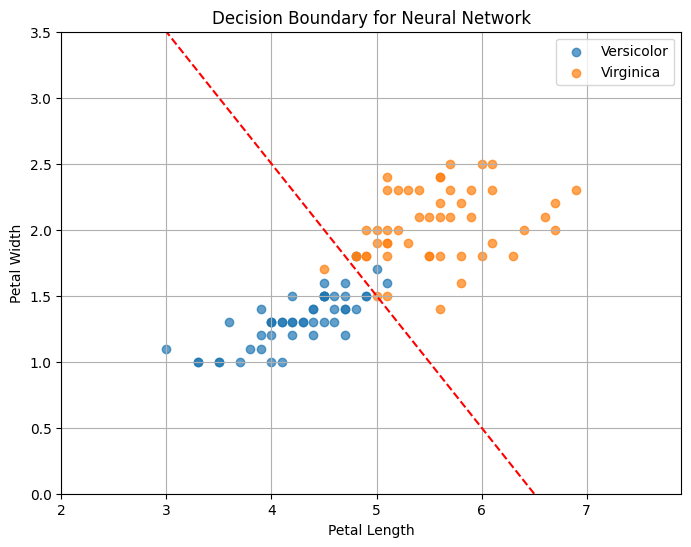

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Iris dataset
data = pd.read_csv('irisdata.csv')

# Filter for two species: Versicolor (0) and Virginica (1)
data = data[data['species'].isin(['versicolor', 'virginica'])]  # Select two classes
data['label'] = data['species'].apply(lambda x: 0 if x == 'versicolor' else 1)  # Map species to 0 and 1

# Extract features (petal_length, petal_width) and labels
X = data[['petal_length', 'petal_width']].values  # Feature matrix
y = data['label'].values  # Class labels

# Define the sigmoid function
def sigmoid(z):
    """
    Applies the sigmoid function element-wise.
    """
    return 1 / (1 + np.exp(-z))

# Define the one-layer neural network output function
def neural_network_output(X, w, b):
    """
    Computes the output of a one-layer neural network with sigmoid activation.

    Parameters:
    - X: Input feature matrix (2D NumPy array with shape [n_samples, n_features])
    - w: Weight vector (1D NumPy array with shape [n_features])
    - b: Bias term (scalar)

    Returns:
    - y_hat: Predicted outputs (1D NumPy array with shape [n_samples])
    """
    z = np.dot(X, w) + b  # Compute the weighted sum
    return sigmoid(z)  # Apply sigmoid activation

# Initialize weights and bias
w = np.array([-1.0, -1.0])  # Example weights for petal_length and petal_width
b = 6.5  # Example bias

# Compute the network output
outputs = neural_network_output(X, w, b)

# Print results for the first 5 data points
print("Input features (first 5 rows):")
print(X[:5])
print("\nTrue labels (first 5 rows):")
print(y[:5])
print("\nNeural network outputs (first 5 rows):")
print(outputs[:5])

# Plot the dataset and decision boundary
def plot_decision_boundary(X, y, w, b):
    """
    Plots the data points and the decision boundary for the neural network.

    Parameters:
    - X: Feature matrix
    - y: Labels
    - w: Weights
    - b: Bias
    """
    plt.figure(figsize=(8, 6))
    
    # Scatter plot of the data
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Versicolor', alpha=0.7)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Virginica', alpha=0.7)

    # Define the grid for the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Compute the network output for the grid points
    grid_outputs = neural_network_output(grid, w, b).reshape(xx.shape)
    
    # Plot the decision boundary (where output = 0.5)
    plt.contour(xx, yy, grid_outputs, levels=[0.5], colors='red', linestyles='--')

    # Add plot details
    plt.title('Decision Boundary for Neural Network')
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.legend()
    plt.grid(True)
    plt.show()

# plot function
plot_decision_boundary(X, y, w, b)



## Excercise 1c)
